In [8]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from scipy.optimize import curve_fit
from scipy import integrate as intg

In [7]:
print("Average number of entanglement for Mw equals 140 with", "\nD = 1.0 is ", df['140_1.0'].mean(), "\nD = 1.4 is ", (df['140_1.4']).mean(), "\nD = 1.8 is ", (df['140_1.8']).mean(), "\nD = 2.0 is ", (df['140_2.0']).mean())

Average number of entanglement for Mw equals 140 with 
D = 1.0 is  3.8386 
D = 1.4 is  2.894775 
D = 1.8 is  2.1258833333333333 
D = 2.0 is  1.907125


## Dealing with log plots

In [9]:
df = pd.read_excel (r'/Users/taofeektejuosho_che_desktop/Dropbox (UFL)/phd/Fall_2023/post_processing/E2E/e2e_analysis.xlsx', sheet_name='e2e')
df

,timestep,1.0_100,1.2_100,1.4_100,1.6_100,1.8_100,2.0_100,1.0_60,1.2_60,1.4_60,...,1.0_140,1.2_140,1.4_140,1.0_140.1,1.8_140,2.0_140,1.0_180,1.0_220,1.4_220,2.0_220
0,0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,3,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,0.9999,0.9999,1.0000,...,1.0,1.0000,0.9999,1.0,1.0000,1.0001,1.0000,1.0000,1.0000,1.0000
3,7,1.0000,1.0000,1.0001,1.0,1.0000,1.0001,0.9999,0.9998,1.0000,...,1.0,1.0001,0.9999,1.0,0.9999,1.0001,1.0000,1.0001,1.0000,1.0000
4,15,0.9999,0.9999,1.0001,1.0,0.9998,1.0000,1.0000,0.9996,1.0001,...,1.0,1.0001,0.9998,1.0,0.9996,1.0003,0.9998,1.0001,1.0000,1.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,99647487,NaN,NaN,NaN,NaN,0.0139,0.0207,NaN,NaN,0.0126,...,NaN,NaN,0.0526,NaN,NaN,NaN,NaN,NaN,0.1066,0.1070
2011,99680255,NaN,NaN,NaN,NaN,0.0125,0.0259,NaN,NaN,0.0098,...,NaN,NaN,0.0492,NaN,NaN,NaN,NaN,NaN,0.1079,0.1070
2012,99745791,NaN,NaN,NaN,NaN,0.0107,0.0261,NaN,NaN,0.0029,...,NaN,NaN,0.0519,NaN,NaN,NaN,NaN,NaN,0.1090,0.1075
2013,99876863,NaN,NaN,NaN,NaN,0.0067,0.0135,NaN,NaN,-0.0121,...,NaN,NaN,0.0509,NaN,NaN,NaN,NaN,NaN,0.1108,0.1075


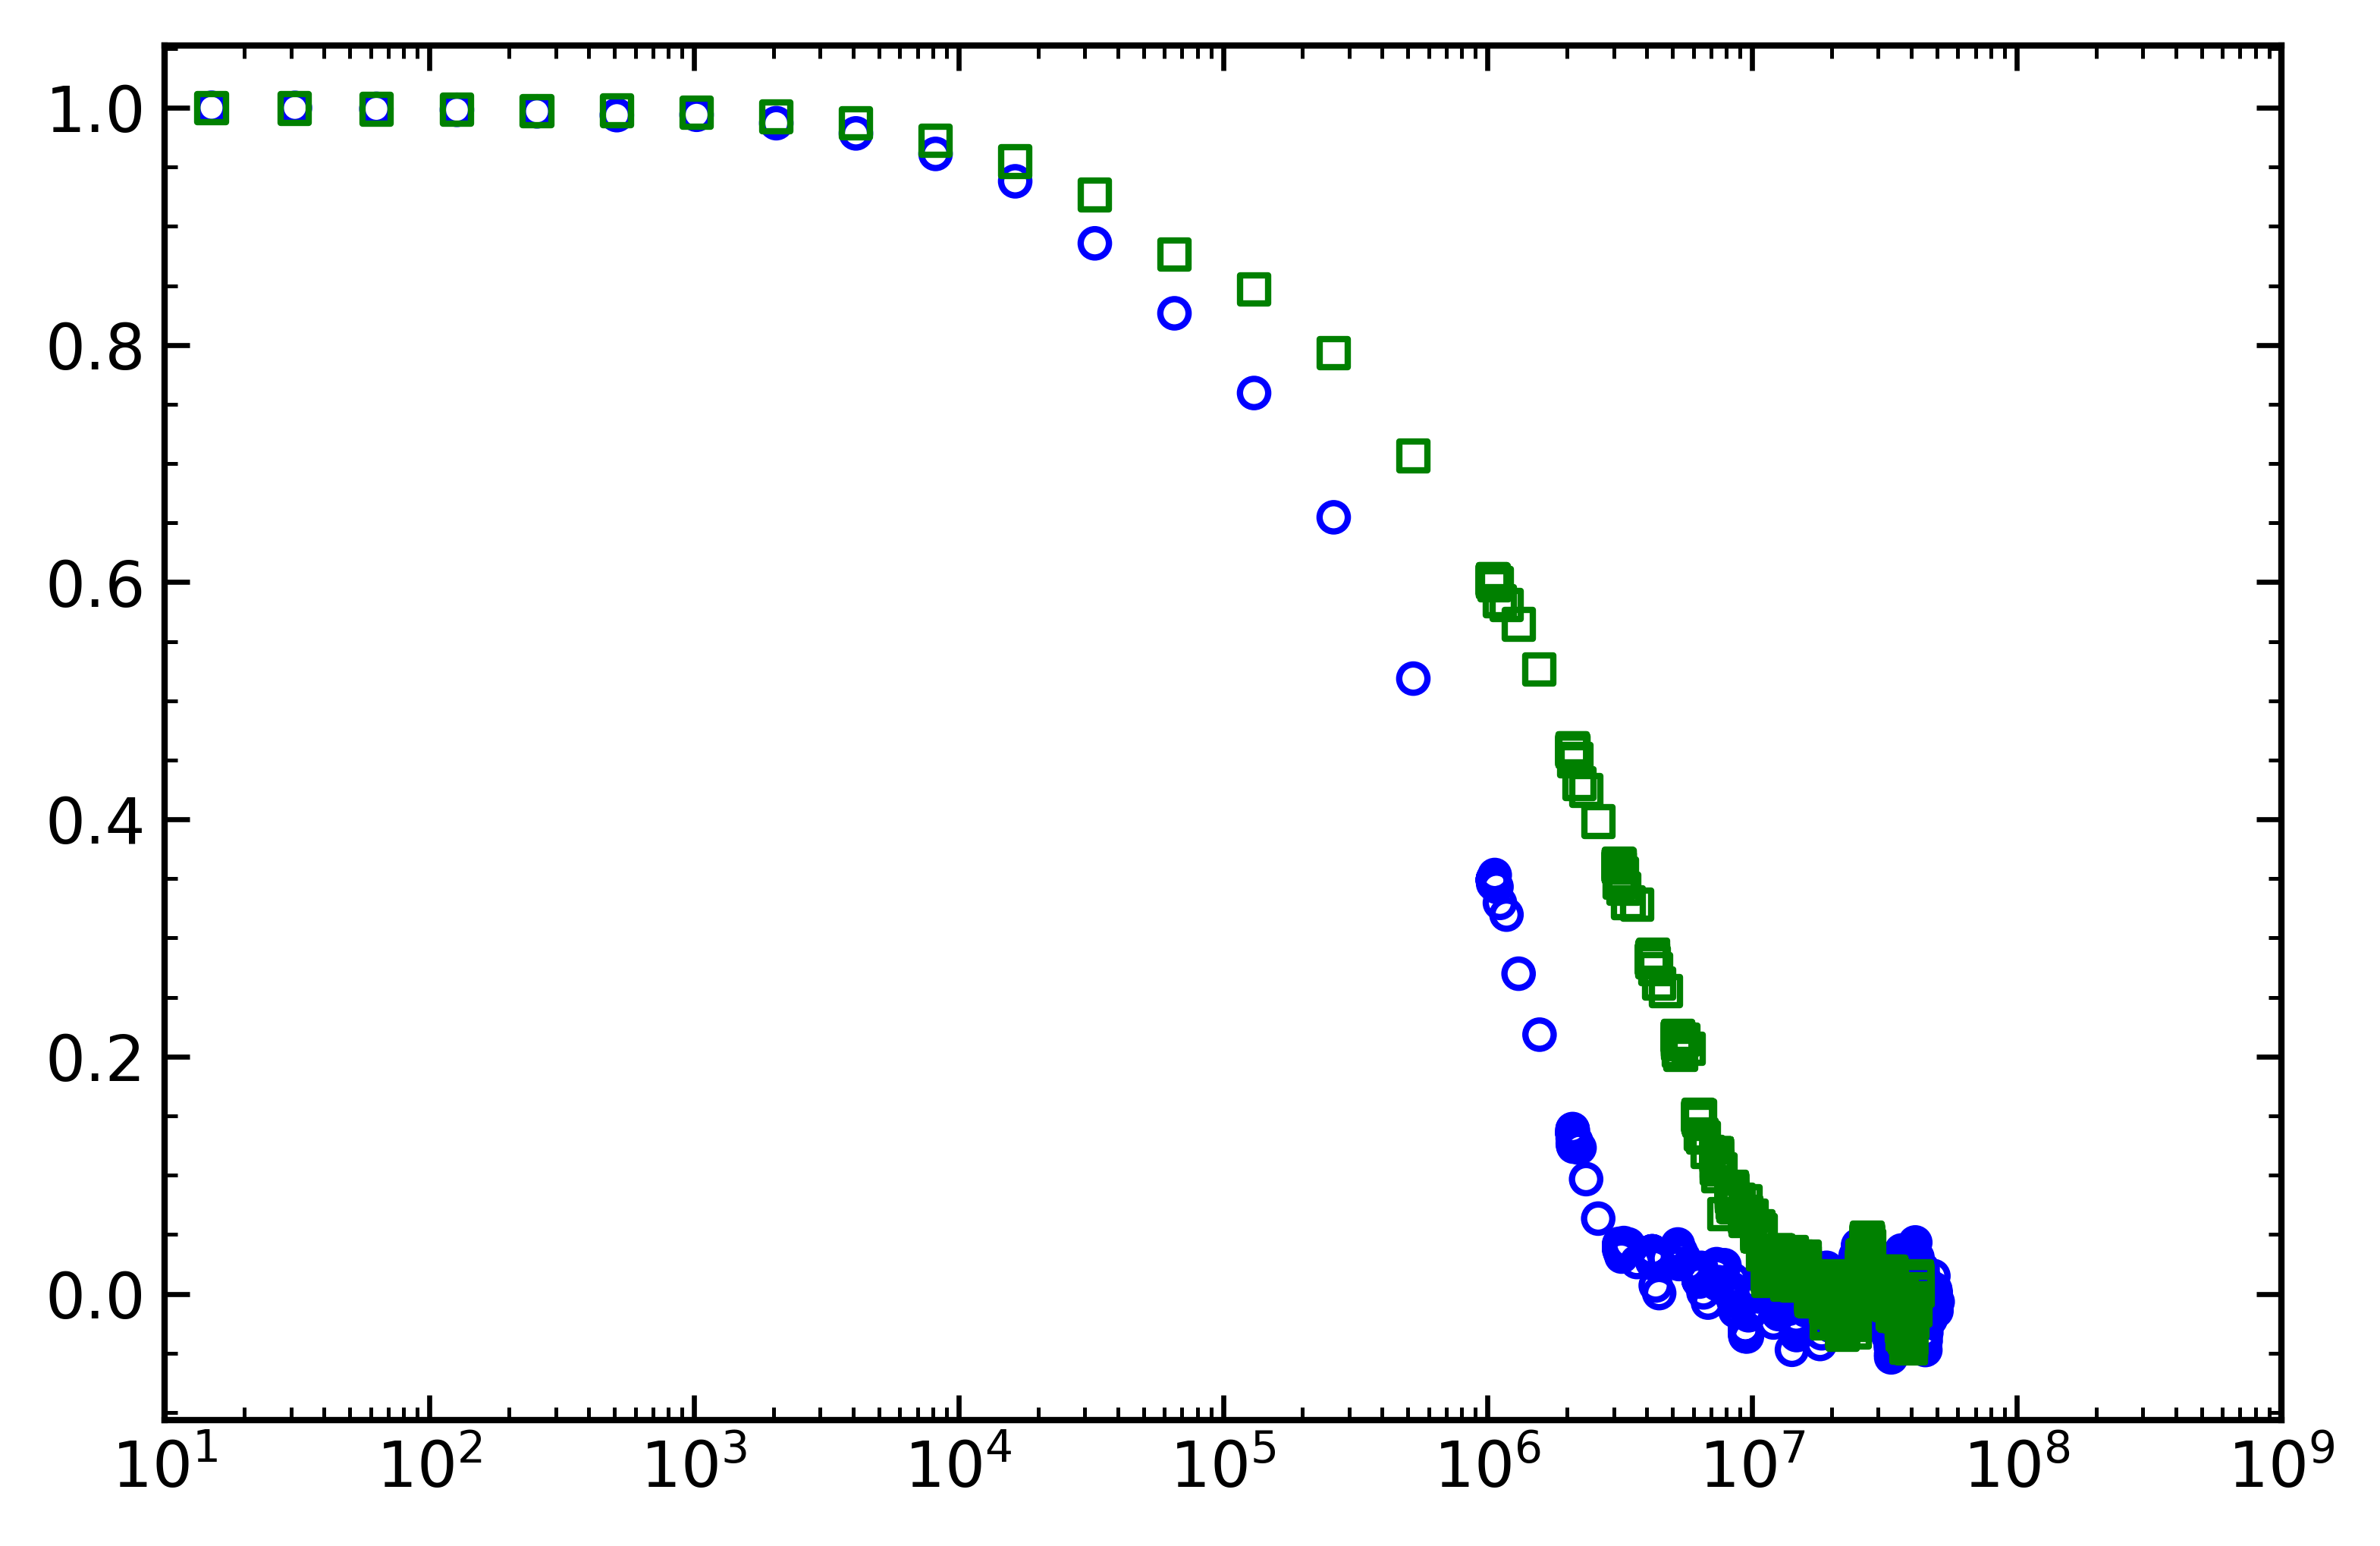

In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams["figure.dpi"] = 600
#x = np.random.randn(60) 
#y = np.random.randn(60)
#df1 - monomer MSD - close symbol
#df - center of mass MSD - open symbol
plt.scatter(df['timestep'], df['1.0_60'], s=20, marker = "o", facecolors='none', edgecolors='blue')
plt.scatter(df['timestep'], df['1.0_100'], s=20, marker = 's', facecolors='none', edgecolors='green')
#plt.scatter(df['timestep'], df['D = 2.0'], s=20, marker = ">", facecolors='none', edgecolors='red')
#plt.scatter(df1['step'], df1['D = 2.0'], s=25, marker = 'o',facecolors='none', edgecolors='r')

plt.xscale("log")
#ax = plt.axes()
#plt.yscale("log")
#plt.ylim((0.0001,10000))
plt.xlim((10, 1000000000))
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4, pad = 3)
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)
#plt.tick_params(which='minor', length=2, color='r')
plt.rcParams["axes.linewidth"] = 1
plt.savefig('MSD_COM.png')
plt.show()

In [19]:
df = pd.read_excel(r'/Users/taofeektejuosho_che_desktop/Dropbox (UFL)/phd/Fall_2023/post_processing/MSD&Monomer/MSD_COM/msd.xlsx', sheet_name='Chain_140_in_Melt_140')
df.columns

Index(['step', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'D = 1.0', 'D = 1.4',
       'D = 2.0'],
      dtype='object')

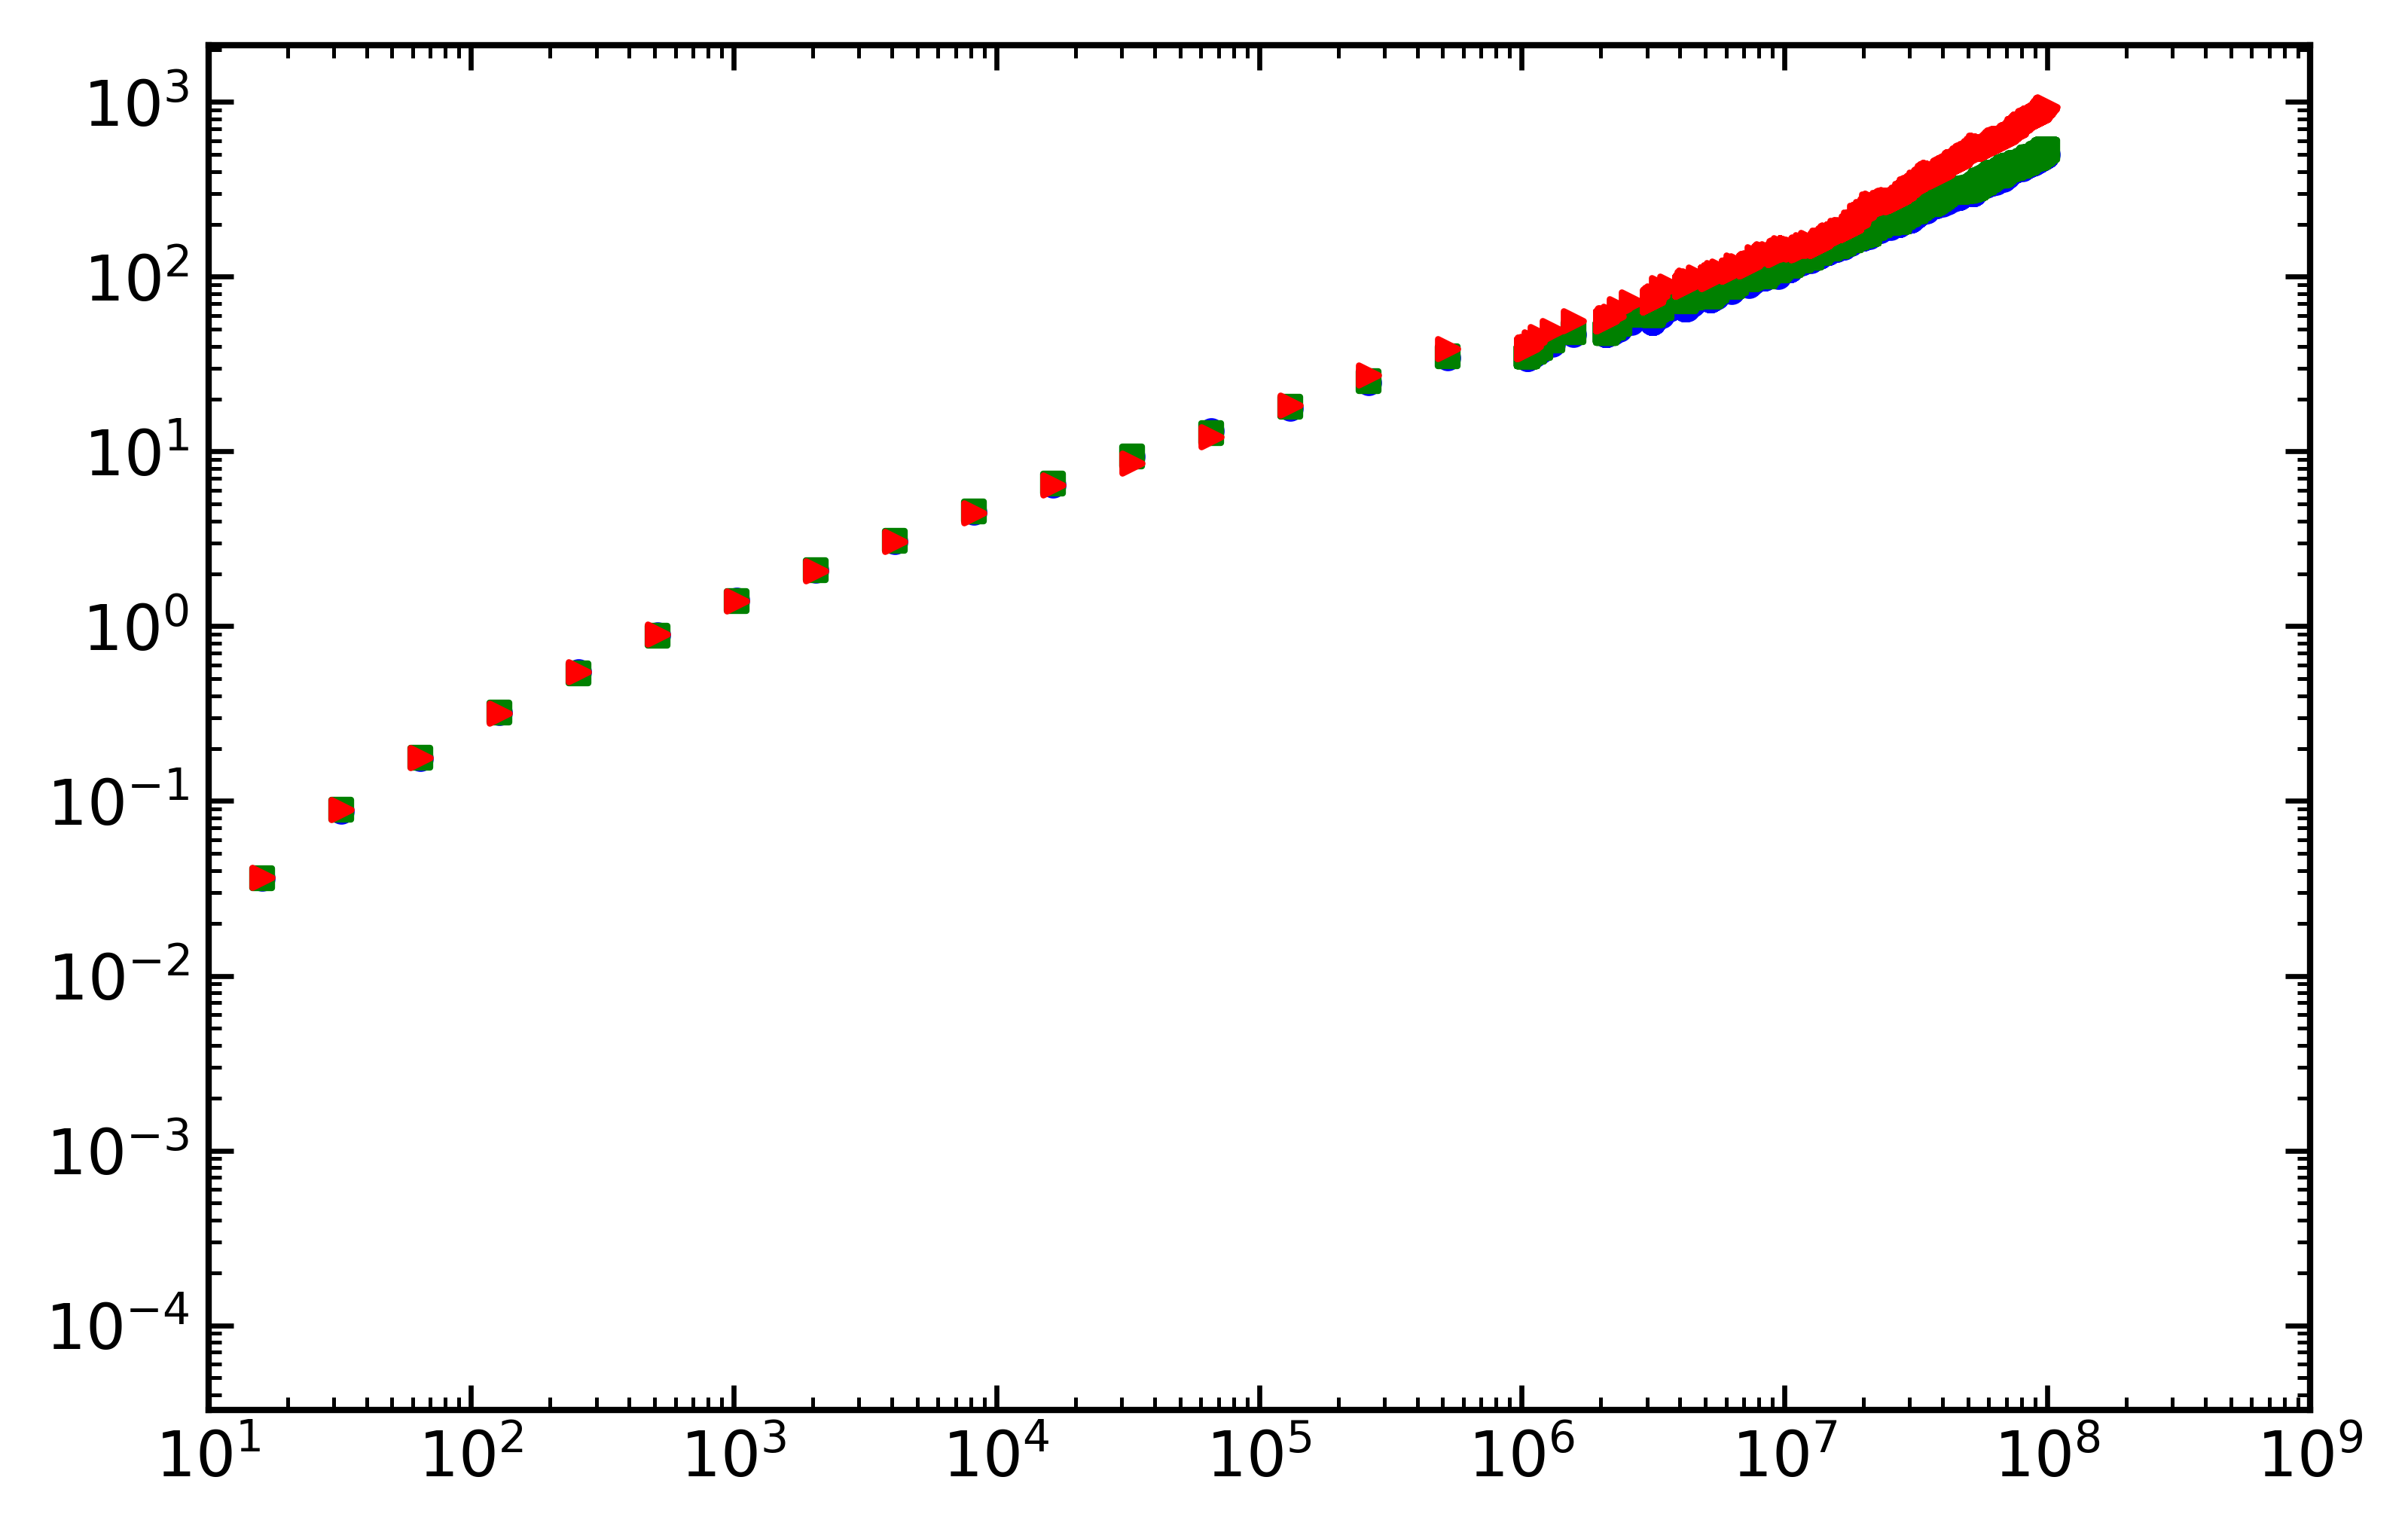

In [20]:
plt.scatter(df['step'], df['D = 1.0'], s=10, marker = "o", facecolors='blue', edgecolors='blue')
plt.scatter(df['step'], df['D = 1.4'], s=10, marker = 's', facecolors='green', edgecolors='green')
plt.scatter(df['step'], df['D = 2.0'], s=10, marker = ">", facecolors='red', edgecolors='red')
#plt.title("Monomer MSD for different chains in 140, D = 2.0 melt")
#ax = plt.axes()
plt.xscale("log")
#ax = plt.axes()
plt.yscale("log")
#plt.ylim((0.0001,10000))
plt.xlim((10, 1000000000))
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4, pad = 3)
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)
#plt.tick_params(which='minor', length=2, color='r')
plt.rcParams["axes.linewidth"] = 1
plt.savefig('MSD_COM.png')
plt.show()

In [21]:
df = pd.read_excel(r'/Users/taofeektejuosho_che_desktop/Dropbox (UFL)/phd/Fall_2023/post_processing/MSD&Monomer/MSD_COM/msd.xlsx', sheet_name='Chain_140_in_Melt_140')
df.columns

Index(['step', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'D = 1.0', 'D = 1.4',
       'D = 2.0'],
      dtype='object')

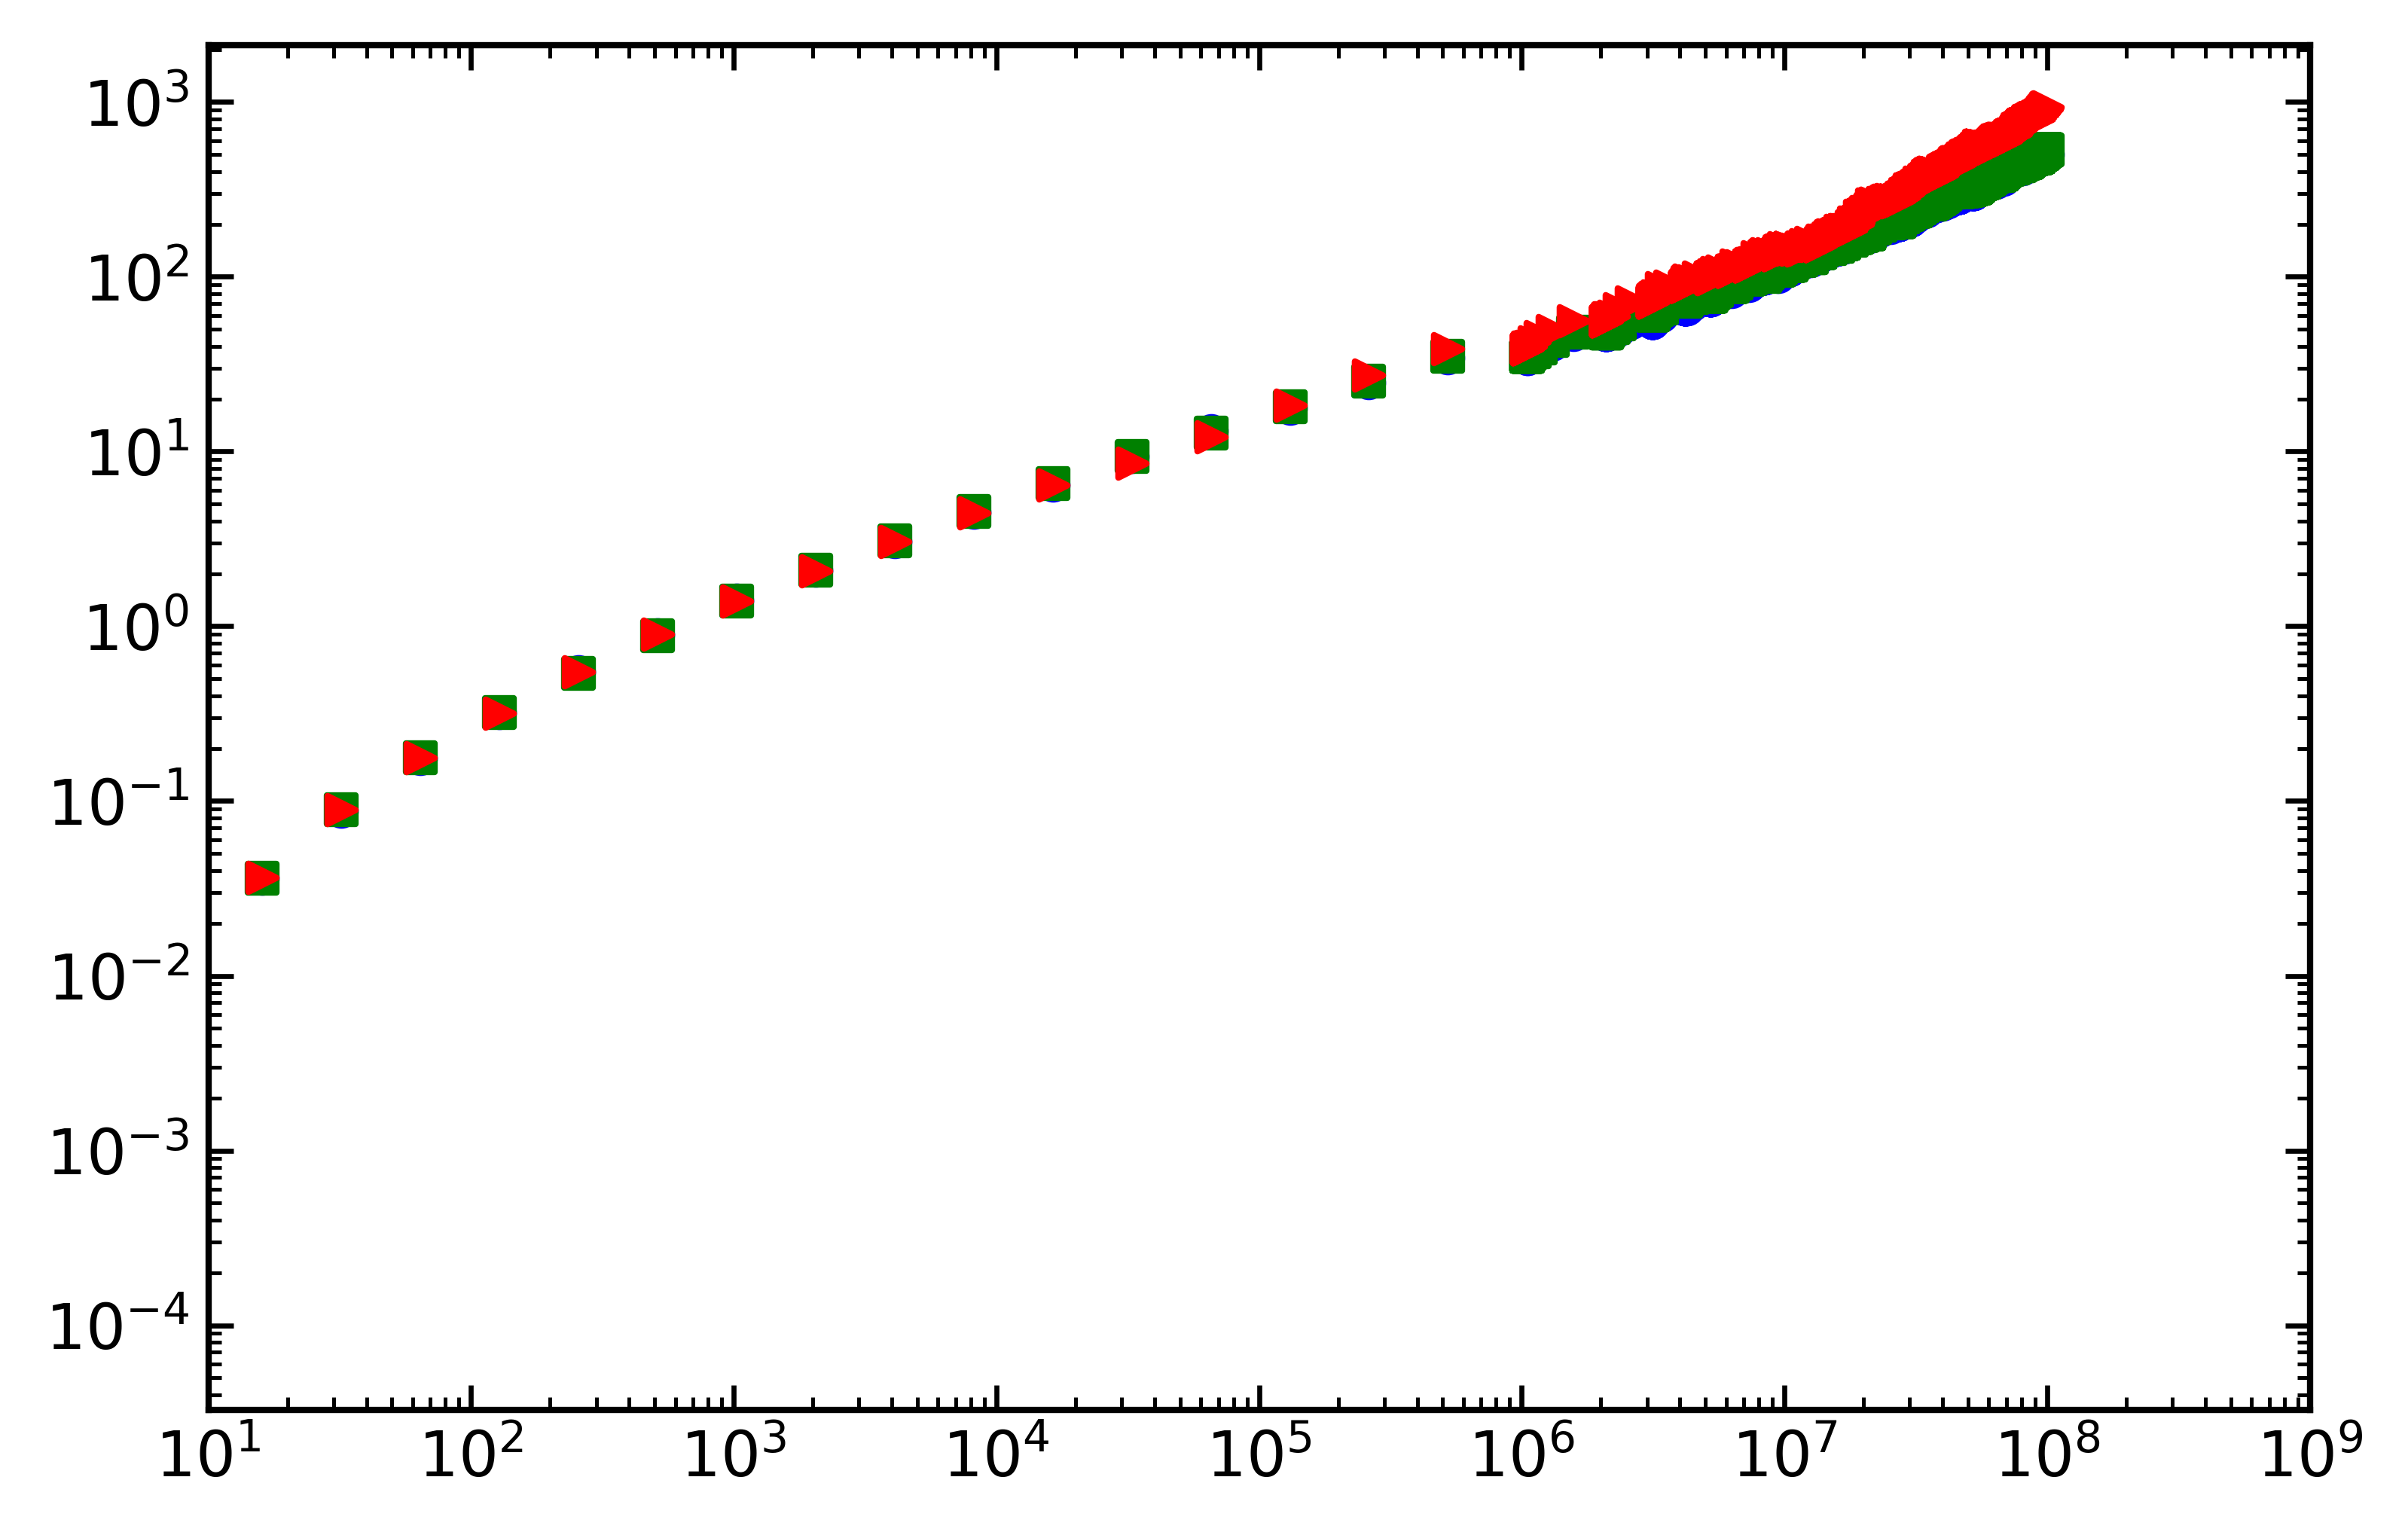

In [23]:
plt.scatter(df['step'], df['D = 1.0'], s=20, marker = "o", facecolors='blue', edgecolors='blue')
plt.scatter(df['step'], df['D = 1.4'], s=20, marker = 's', facecolors='green', edgecolors='green')
plt.scatter(df['step'], df['D = 2.0'], s=20, marker = ">", facecolors='red', edgecolors='red')

#ax = plt.axes()
plt.xscale("log")
#ax = plt.axes()
plt.yscale("log")
#plt.ylim((0.0001,10000))
plt.xlim((10, 1000000000))
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4, pad = 3)
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)
#plt.tick_params(which='minor', length=2, color='r')
plt.rcParams["axes.linewidth"] = 1
plt.savefig('MSD_COM.png')
plt.show()

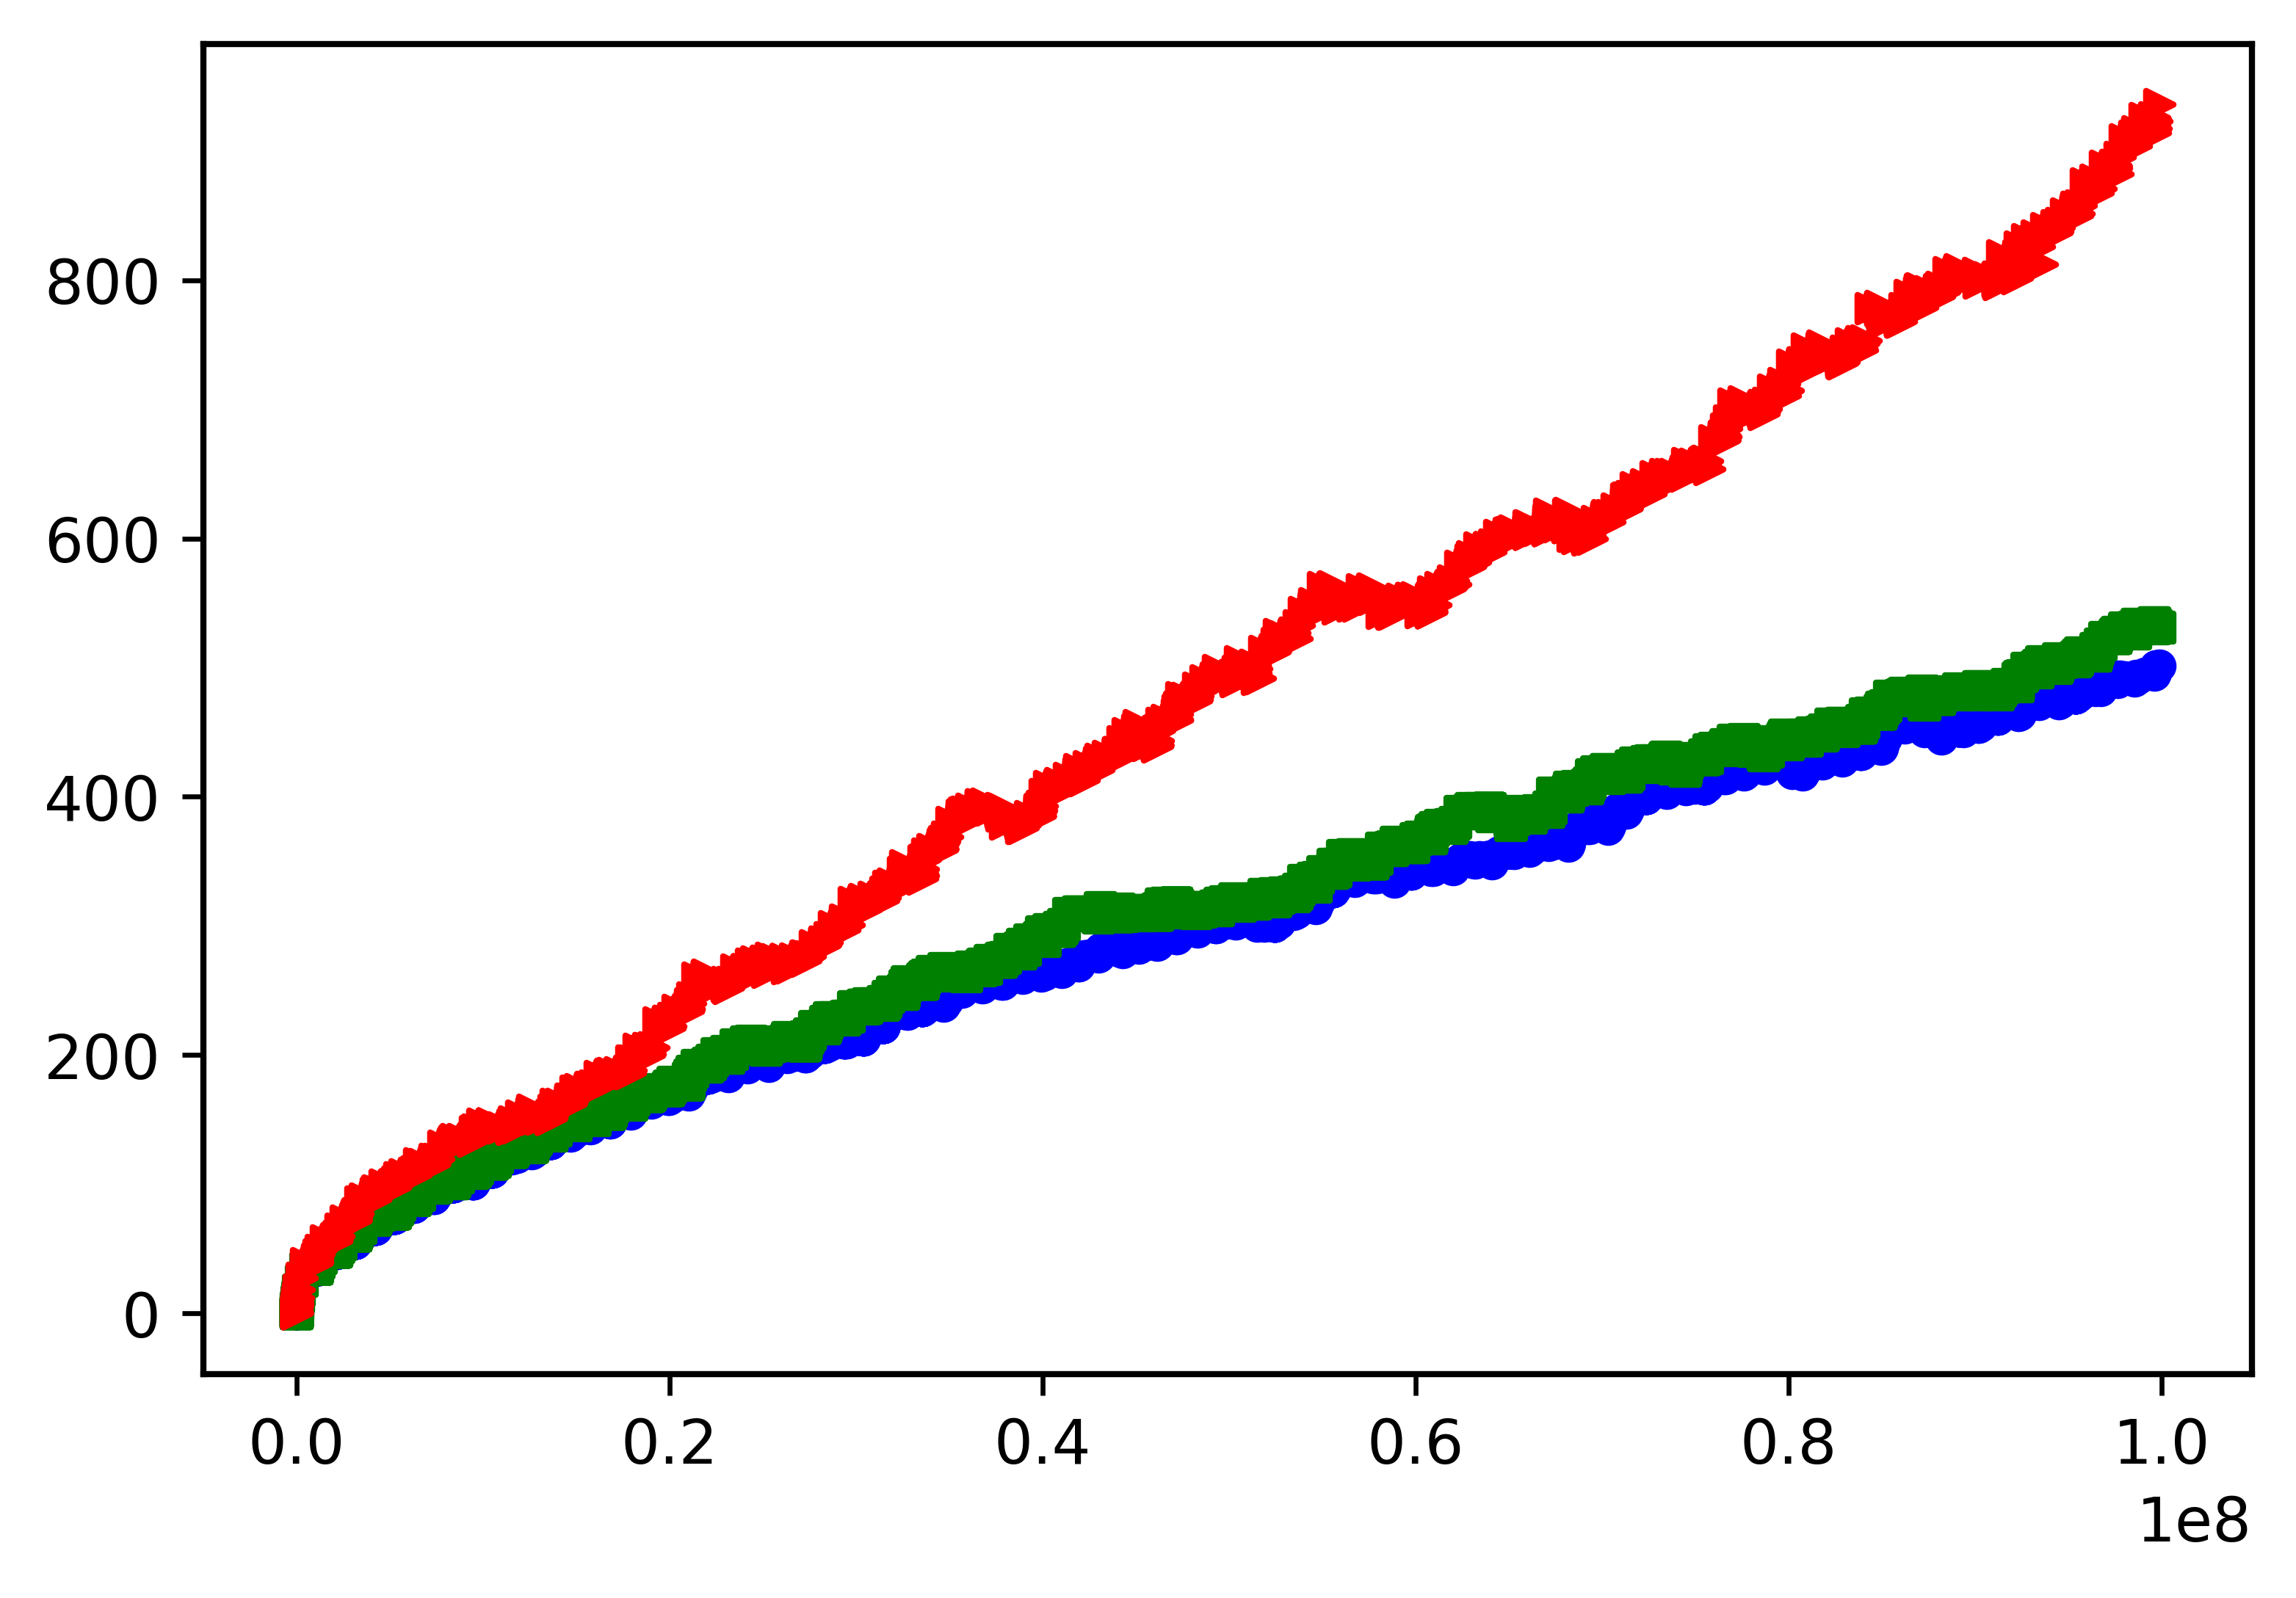

In [24]:
plt.scatter(df['step'], df['D = 1.0'], s=20, marker = "o", facecolors='blue', edgecolors='blue')
plt.scatter(df['step'], df['D = 1.4'], s=20, marker = 's', facecolors='green', edgecolors='green')
plt.scatter(df['step'], df['D = 2.0'], s=20, marker = ">", facecolors='red', edgecolors='red')

# 220 in 220 melt

In [32]:
df = pd.read_excel(r'/Users/taofeektejuosho_che_desktop/Dropbox (UFL)/phd/Fall_2023/post_processing/MSD&Monomer/MSD_COM/msd.xlsx', sheet_name='Chain_140_in_Melt_140')
df.columns

Index(['step', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'D = 1.0', 'D = 1.4',
       'D = 2.0'],
      dtype='object')

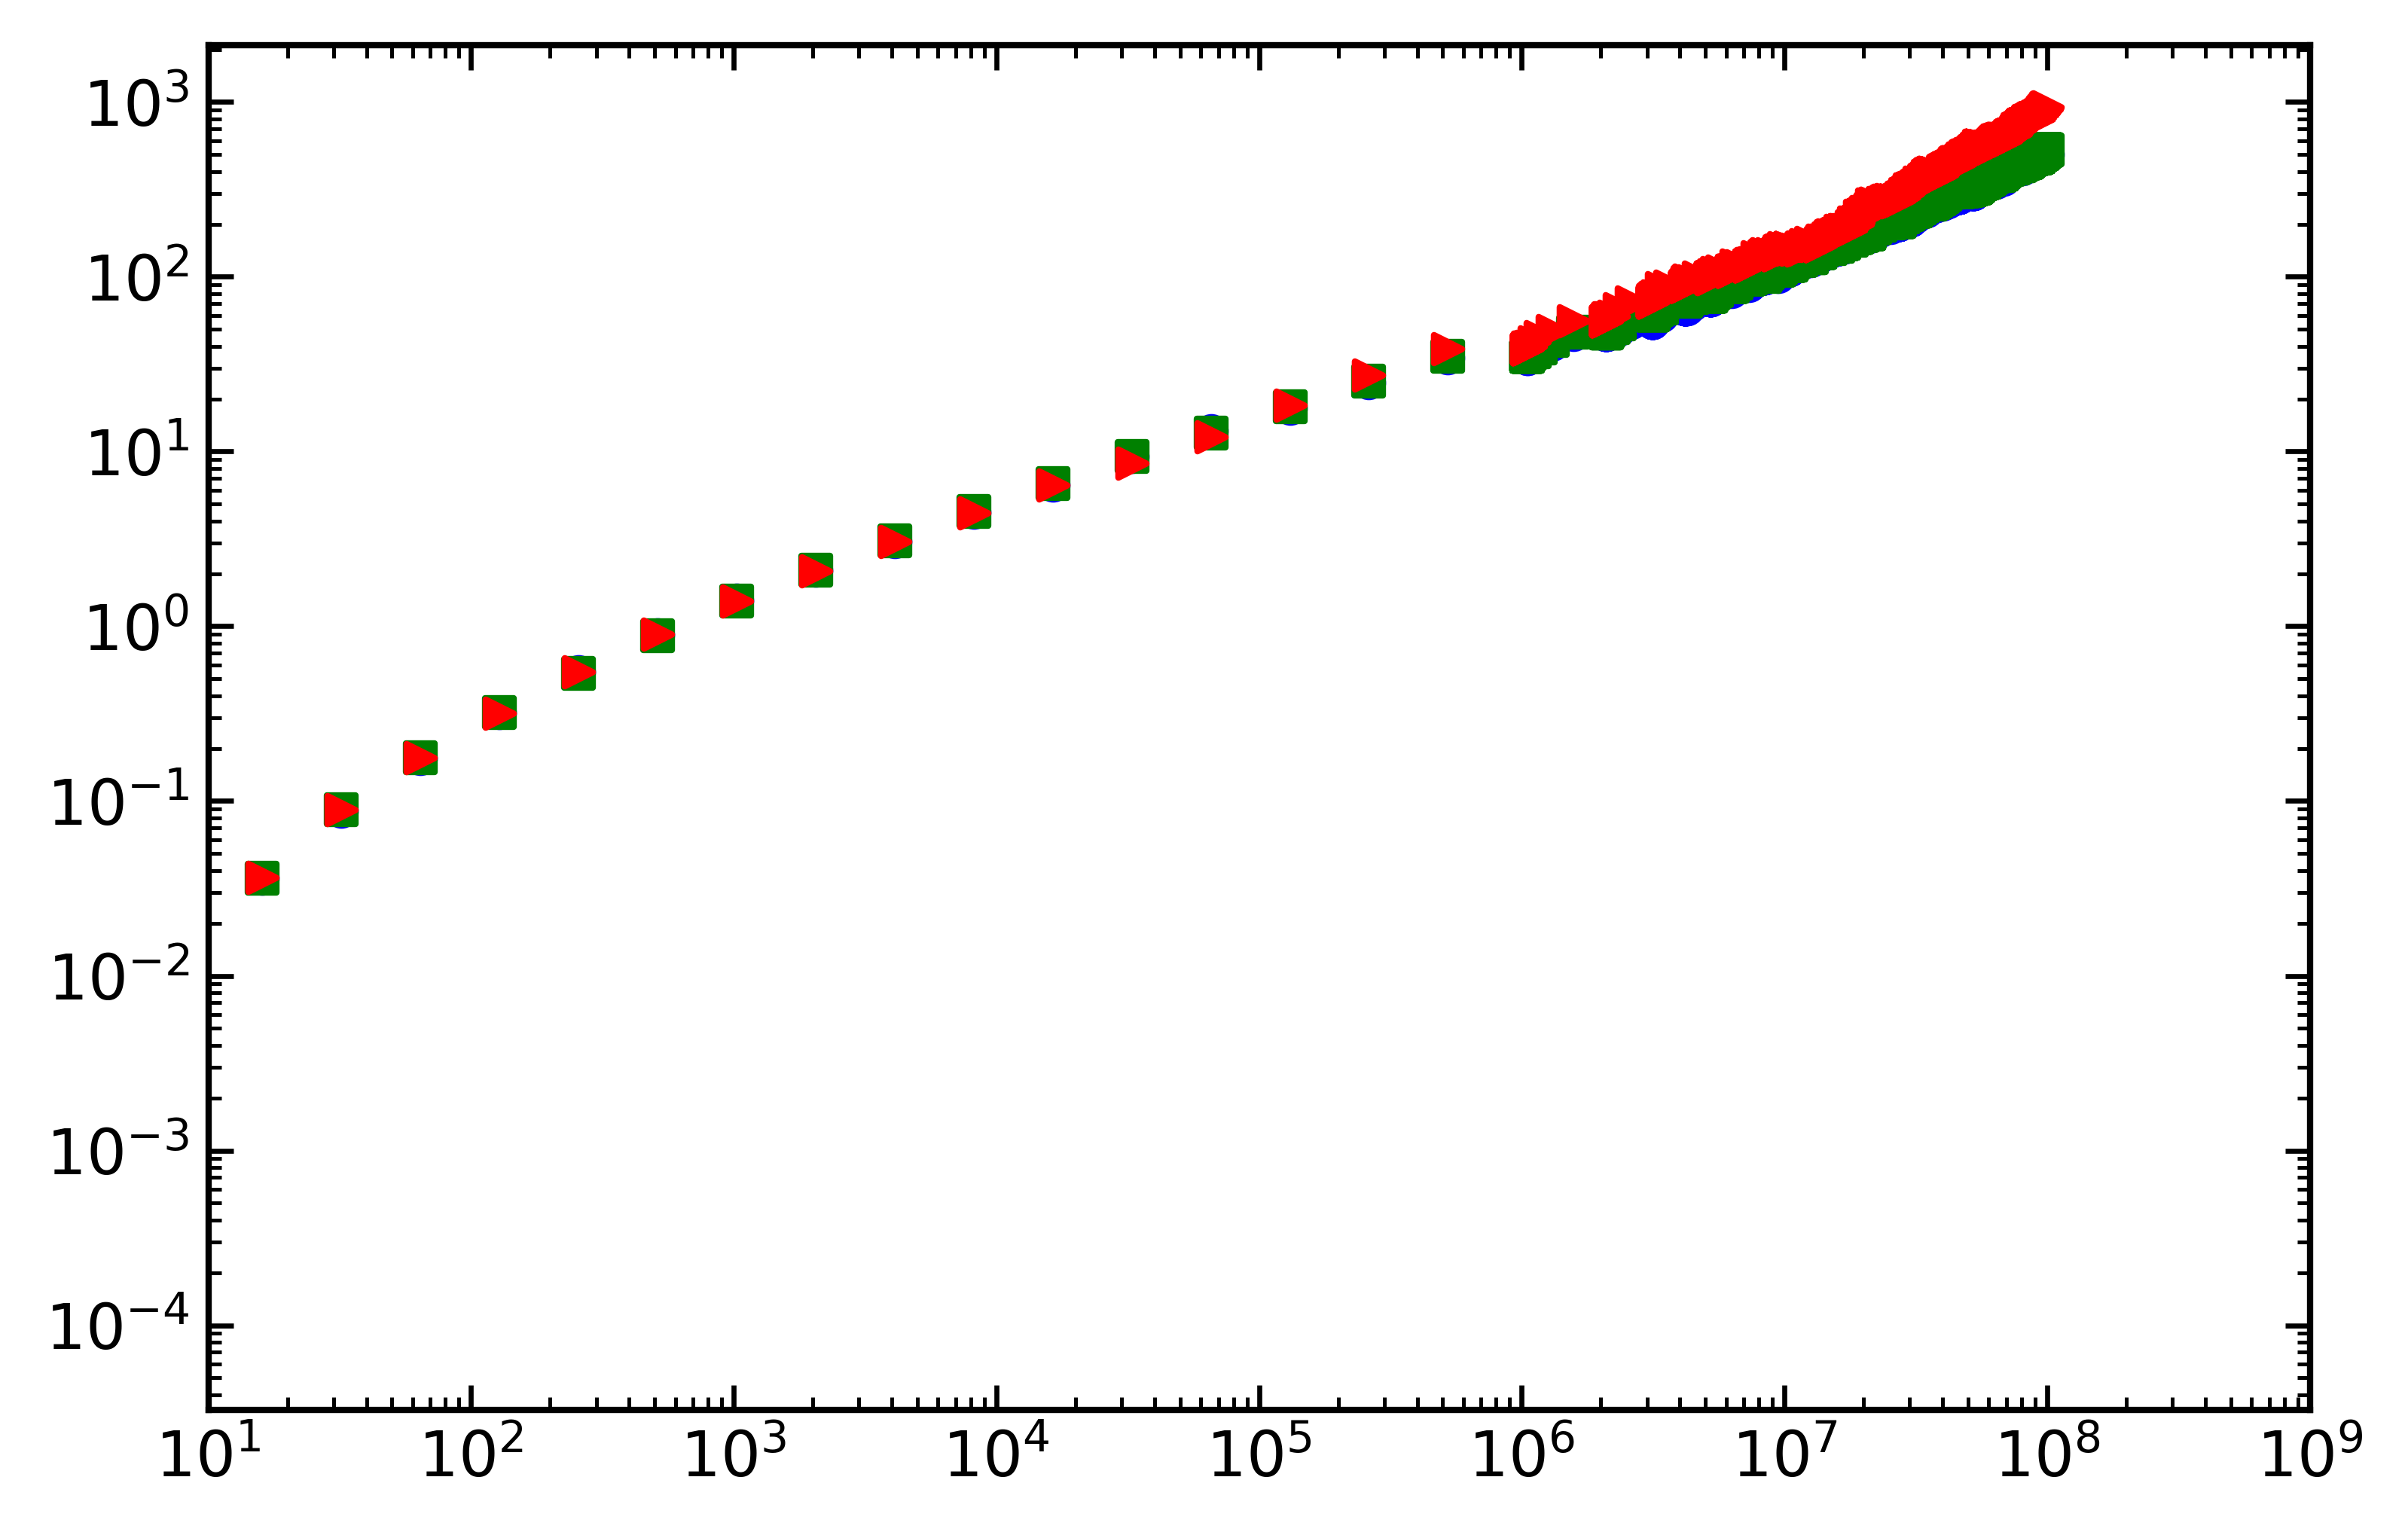

In [33]:
plt.scatter(df['step'], df['D = 1.0'], s=20, marker = "o", facecolors='blue', edgecolors='blue')
plt.scatter(df['step'], df['D = 1.4'], s=20, marker = 's', facecolors='green', edgecolors='green')
plt.scatter(df['step'], df['D = 2.0'], s=20, marker = ">", facecolors='red', edgecolors='red')

#ax = plt.axes()
plt.xscale("log")
#ax = plt.axes()
plt.yscale("log")
#plt.ylim((0.0001,10000))
plt.xlim((10, 1000000000))
plt.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4, pad = 3)
plt.minorticks_on()
plt.tick_params(axis='both', which='minor', direction='in', top=True, right=True, length=2)
#plt.tick_params(which='minor', length=2, color='r')
plt.rcParams["axes.linewidth"] = 1
plt.savefig('MSD_COM.png')
plt.show()

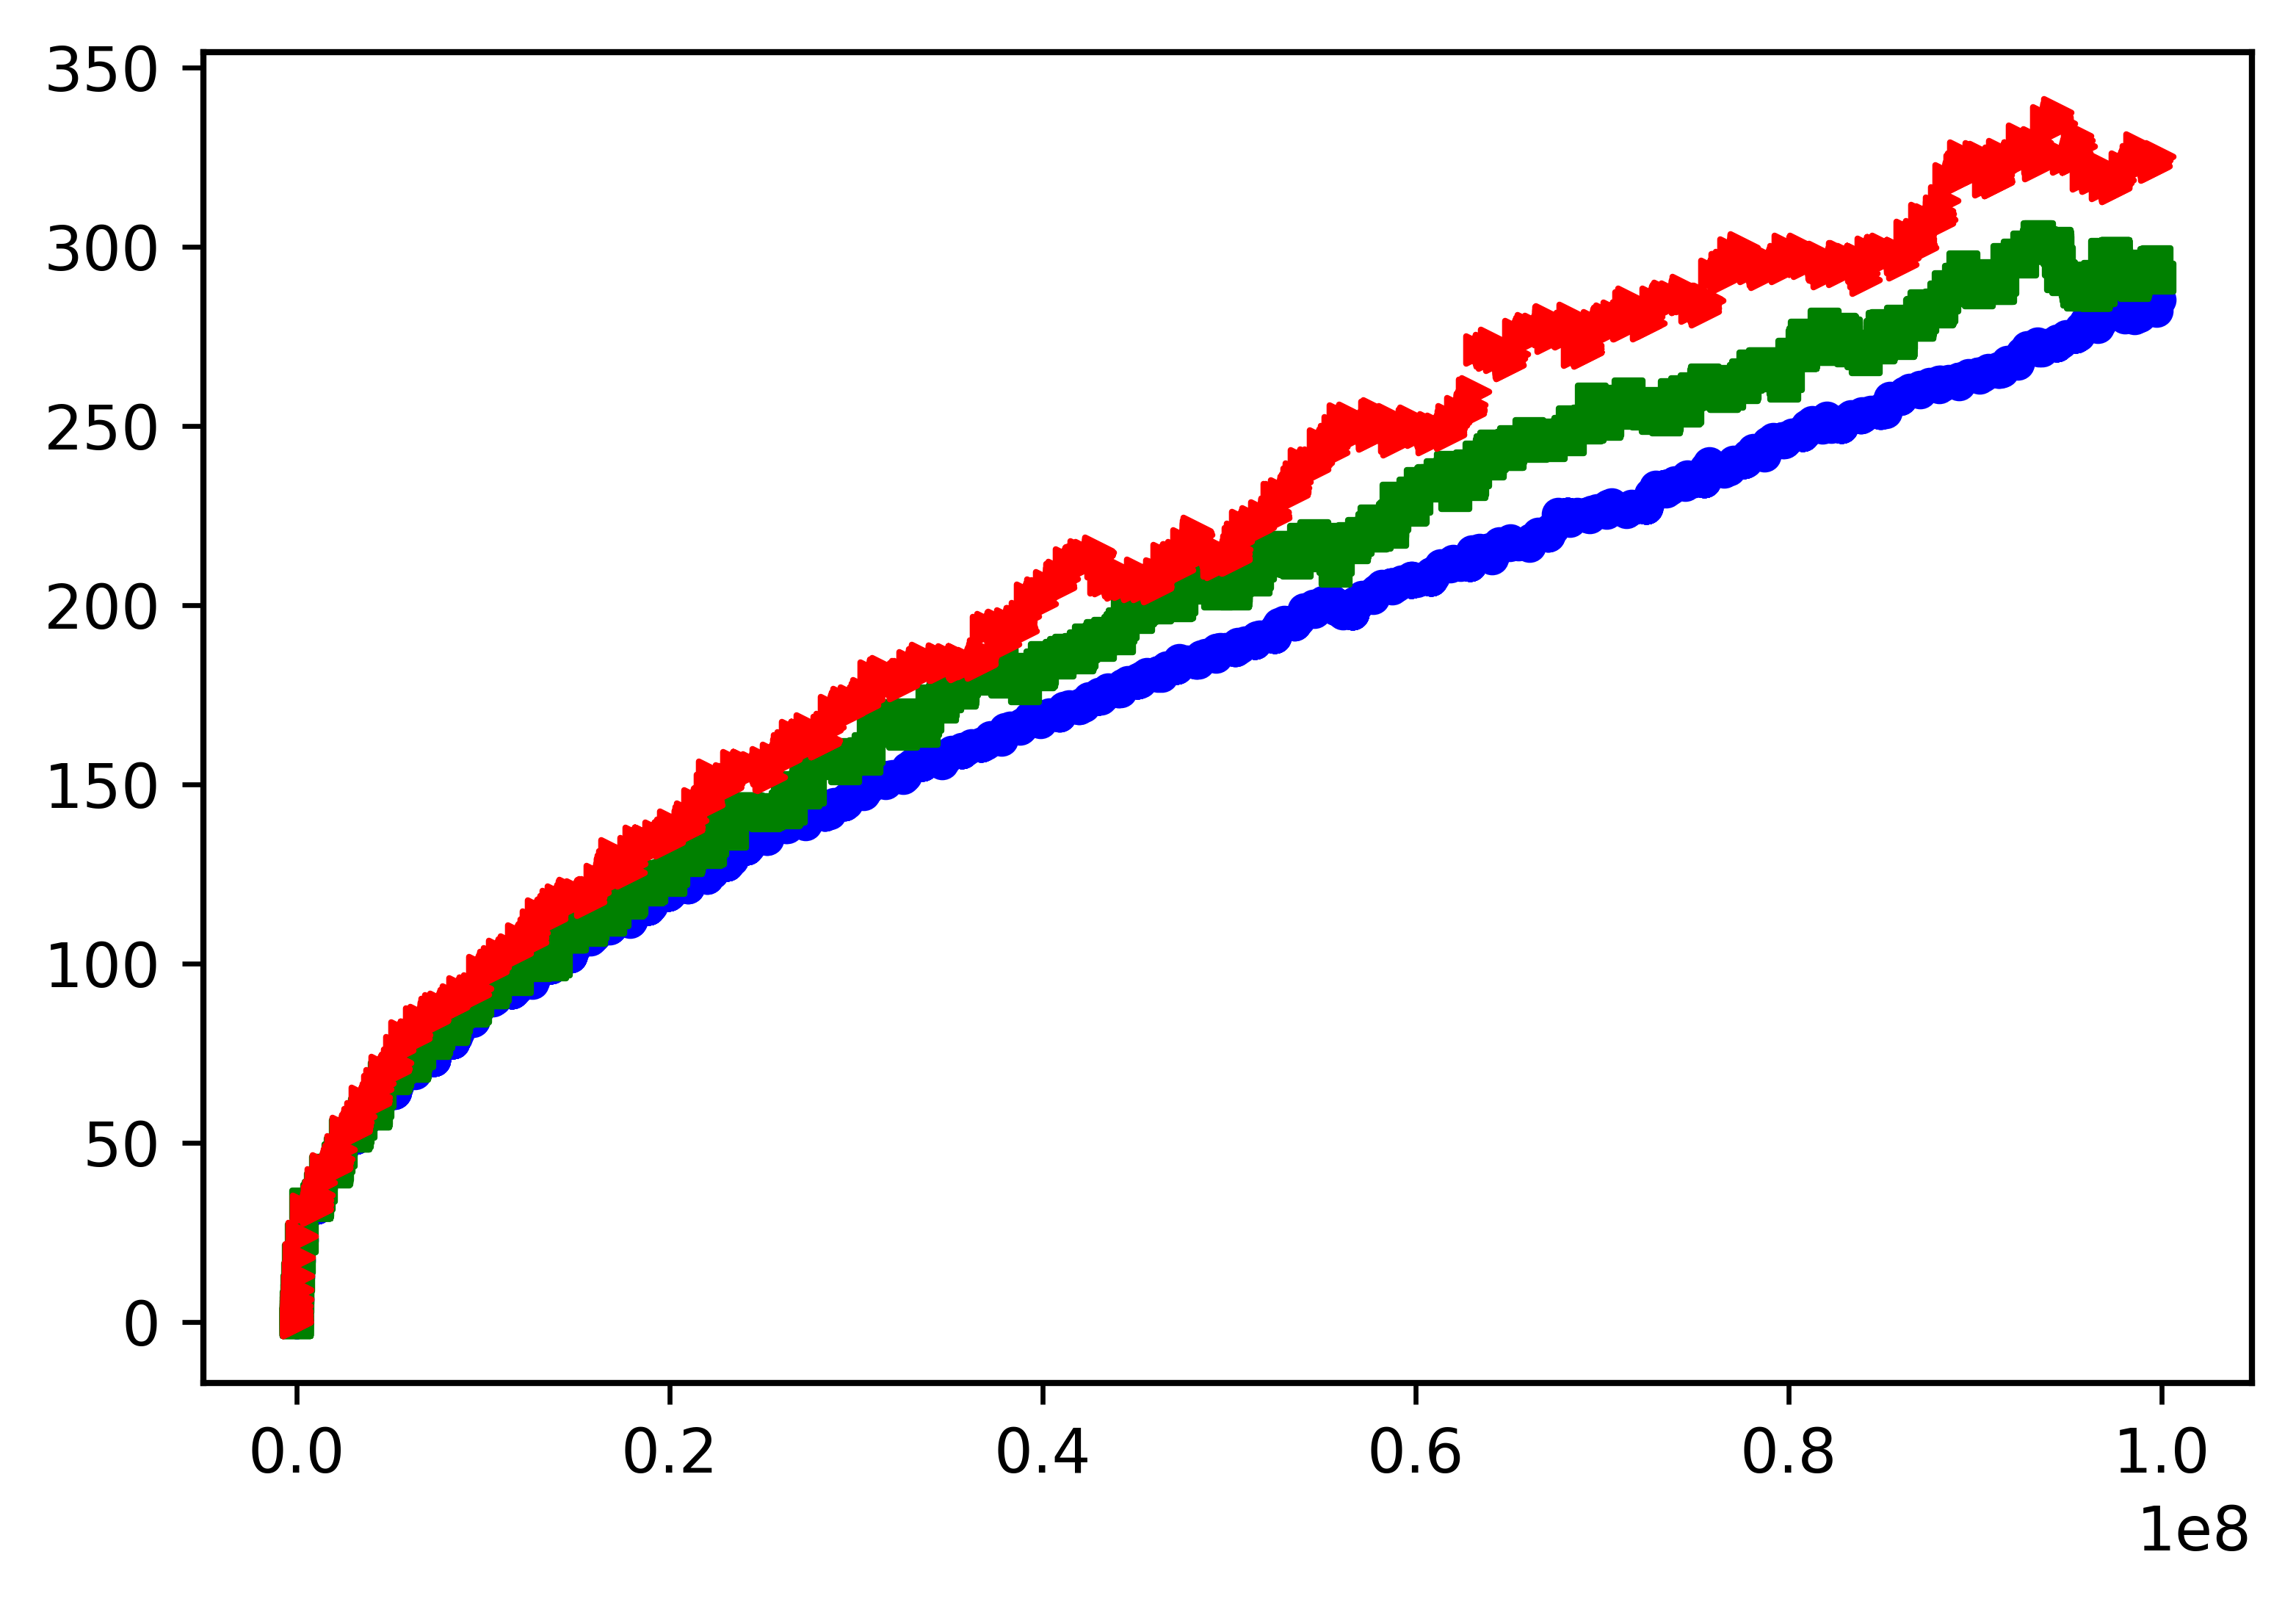

In [31]:
plt.scatter(df['step'], df['D = 1.0'], s=20, marker = "o", facecolors='blue', edgecolors='blue')
plt.scatter(df['step'], df['D = 1.4'], s=20, marker = 's', facecolors='green', edgecolors='green')
plt.scatter(df['step'], df['D = 2.0'], s=20, marker = ">", facecolors='red', edgecolors='red')